In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error, precision_score, recall_score

import pickle

In [23]:
# Data import and curation
# read the dataset representing the movies i've seen 
df = pd.read_csv('dataset/my_move_db.csv')
# describe the imported dataset
# df.info()
#filter only for movies
df = df[df["Title Type"] == "Movie"]

# drop the columns that don't contain usefull features
curated_df = df.drop(columns=["Your Rating", "Date Rated", "Description", "Position", "Const", "Created", "Modified", "Original Title", "URL", "Title Type"], axis=1)

#remove rows that contain null values or are duplicated
curated_df = curated_df.dropna()
curated_df = curated_df.drop_duplicates()
curated_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 0 to 645
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           640 non-null    object 
 1   IMDb Rating     640 non-null    float64
 2   Runtime (mins)  640 non-null    float64
 3   Year            640 non-null    float64
 4   Genres          640 non-null    object 
 5   Num Votes       640 non-null    int64  
 6   Release Date    640 non-null    object 
 7   Directors       640 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 45.0+ KB


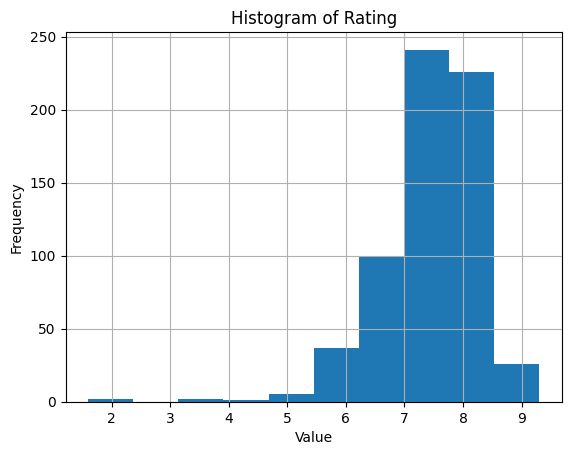

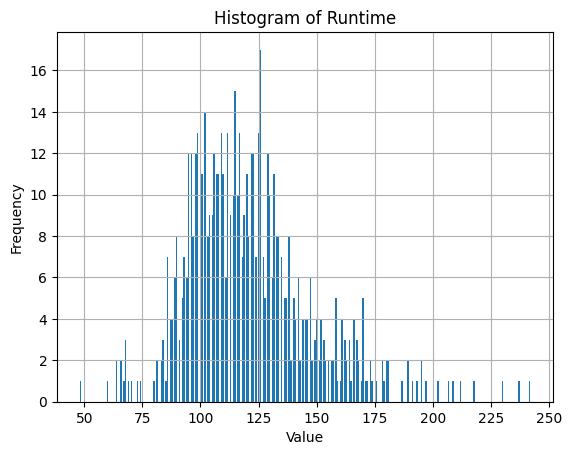

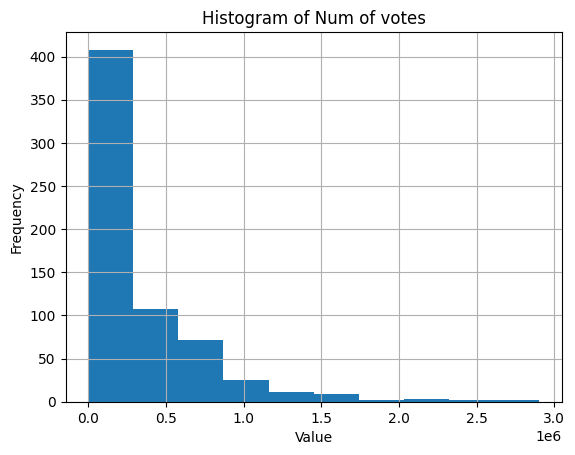

In [39]:
# data visualization

curated_df.describe()


# create histograms for some features

# histogram for rating
curated_df["IMDb Rating"].hist(bins=10)

# Set the title and labels
plt.title('Histogram of Rating')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# histogram for runtime
curated_df["Runtime (mins)"].hist(bins=300)

# Set the title and labels
plt.title('Histogram of Runtime')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# histogram for number of votes
curated_df["Num Votes"].hist(bins=10)

# Set the title and labels
plt.title('Histogram of Num of votes')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Conclusion the dataset looks slightly skewed. A possible explanation is the biased of the data

In [46]:
# Prepare the features and the train, val ,test
# select only columns that have categorical features 
cat_feat = curated_df.select_dtypes(exclude=['int', 'float'])
cat_feat.info()

le = LabelEncoder()
# Label categorical feat 
for col in cat_feat.columns: 
    curated_df[col] = le.fit_transform(curated_df[col])
    
#  curated_df.describe()

# Use log transform to remove skewness from the data
skewed_feat = ["IMDb Rating", "Runtime (mins)", "Num Votes"]

for col in skewed_feat:
    curated_df[col] = np.log(curated_df[col] + 1)
    
curated_df.describe()

#split between test and validation

# Extract target col
x = curated_df.drop(labels="IMDb Rating", axis=1)
y = curated_df["IMDb Rating"]  


# Split for train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)


<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 0 to 645
Empty DataFrame


(512,)

In [71]:
#Linear Regresion Model

lm = LinearRegression()
# Fit the linear model 
lm = lm.fit(x_train, y_train)


# save trained model 

filename = 'model_v1.pkl'
pickle.dump(lm, open(filename, 'wb'))

# Predict on the train, test dataset
lm.score(x_train, pred_train)
lm.score(x_test, pred_test)

# check the performance of the model

# rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
# print("RMSE Test data = ",str(rmse_test))

# rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
# print("RMSE Train data = ",str(rmse_train))

# errors = abs(pred_test - y_test)
# Calc mean absolute procentage error (MAPE)
# mape = 100 * (errors / y_test)

# calcuate acc 
# acc = 100 - np.mean(mape)

# print ("Acc: ", round(acc,2))
acc = precision_score(y_test, pred_test)
#print(f"Accuracy: {accuracy_score(y_test, pred_test)}")

RMSE Test data =  0.007472554826957134


ValueError: continuous is not supported